In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [36]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [37]:
data = data.drop(columns = ['Unnamed: 0'])
data = data.drop(columns = ['Date'])

In [38]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [39]:
data.shape

(16468, 12)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
dtypes: float64(10), object(2)
memory usage: 1.5+ MB


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lab_enc = LabelEncoder()

In [43]:
data1 = lab_enc.fit_transform(data['type'])
data2 = lab_enc.fit_transform(data['region'])

In [44]:
data['region'] = data2
data['type'] = data1

In [45]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


In [46]:
data.isna().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type                0
year            14951
region              0
dtype: int64

In [47]:
data['AveragePrice'] = data['AveragePrice'].fillna(data['AveragePrice'].mean())
data['Total Volume'] = data['Total Volume'].fillna(data['Total Volume'].mean())
data['4046'] = data['4046'].fillna(data['4046'].mean())
data['4225'] = data['4225'].fillna(data['4225'].mean())
data['4770'] = data['4770'].fillna(data['4770'].mean())
data['Total Bags'] = data['Total Bags'].fillna(data['Total Bags'].mean())
data['Small Bags'] = data['Small Bags'].fillna(data['Small Bags'].mean())
data['Large Bags'] = data['Large Bags'].fillna(data['Large Bags'].mean())
data['XLarge Bags'] = data['XLarge Bags'].fillna(data['XLarge Bags'].mean())
data['type'] = data['type'].fillna(data['type'].mode()[0])
data['year'] = data['year'].fillna(data['year'].mode()[0])
data['region'] = data['region'].fillna(data['region'].mode()[0])


In [48]:
data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [49]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000,16468.000000,16468.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.907882,2015.014999,48.254554
std,0.057313,1.345098e+06,5.909424e+05,5.075910e+05,4.180541e+04,2.299843e+05,1.964565e+05,3.586885e+04,2262.202563,0.289201,0.121551,9.912157
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,1.000000,2015.000000,51.000000
50%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,1.000000,2015.000000,51.000000
75%,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,1.000000,2015.000000,51.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,1.000000,2016.000000,51.000000


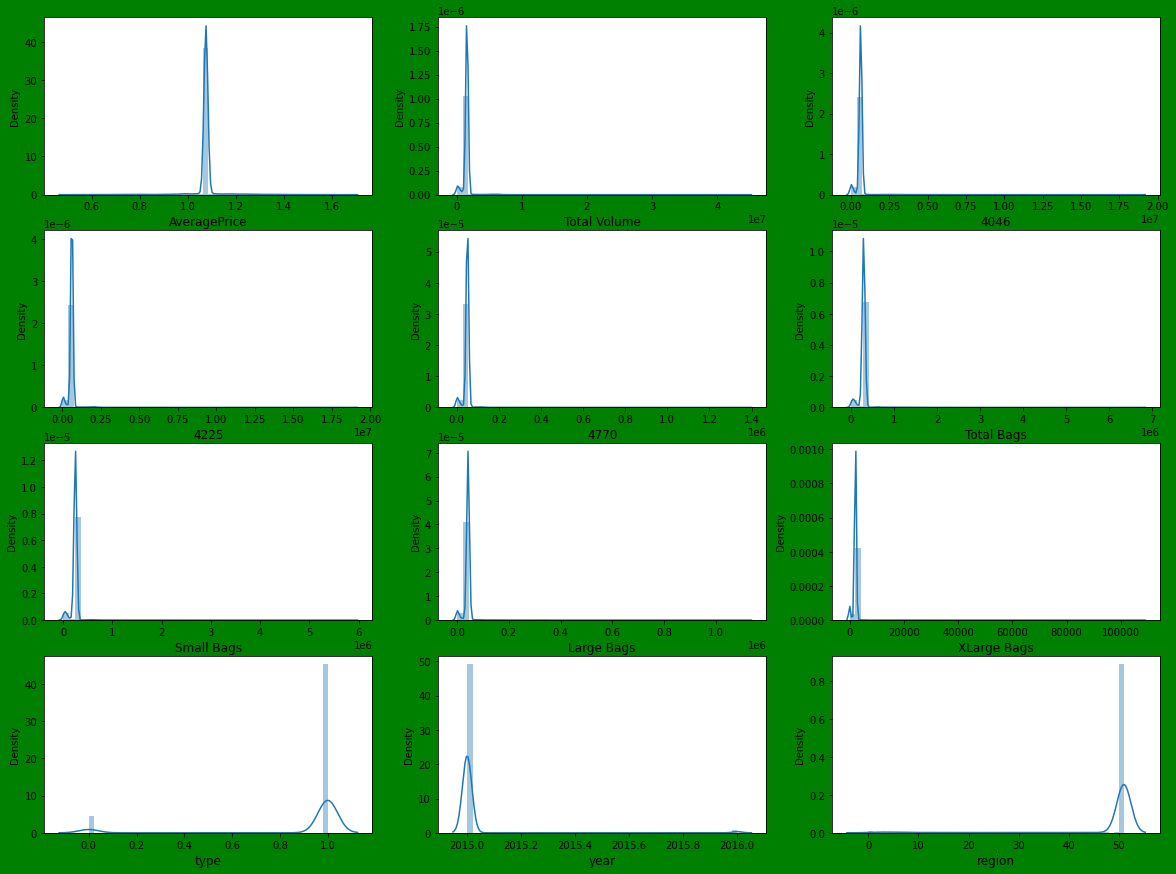

In [50]:
plt.figure(figsize = [20,15], facecolor = 'g')
plotno = 1


for column in data:
    if plotno<=12:
        ax = plt.subplot(4,3,plotno)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
        
    plotno+=1
    
    
plt.show()    

In [51]:
x = data.drop(columns = ['AveragePrice'])
y = data.AveragePrice

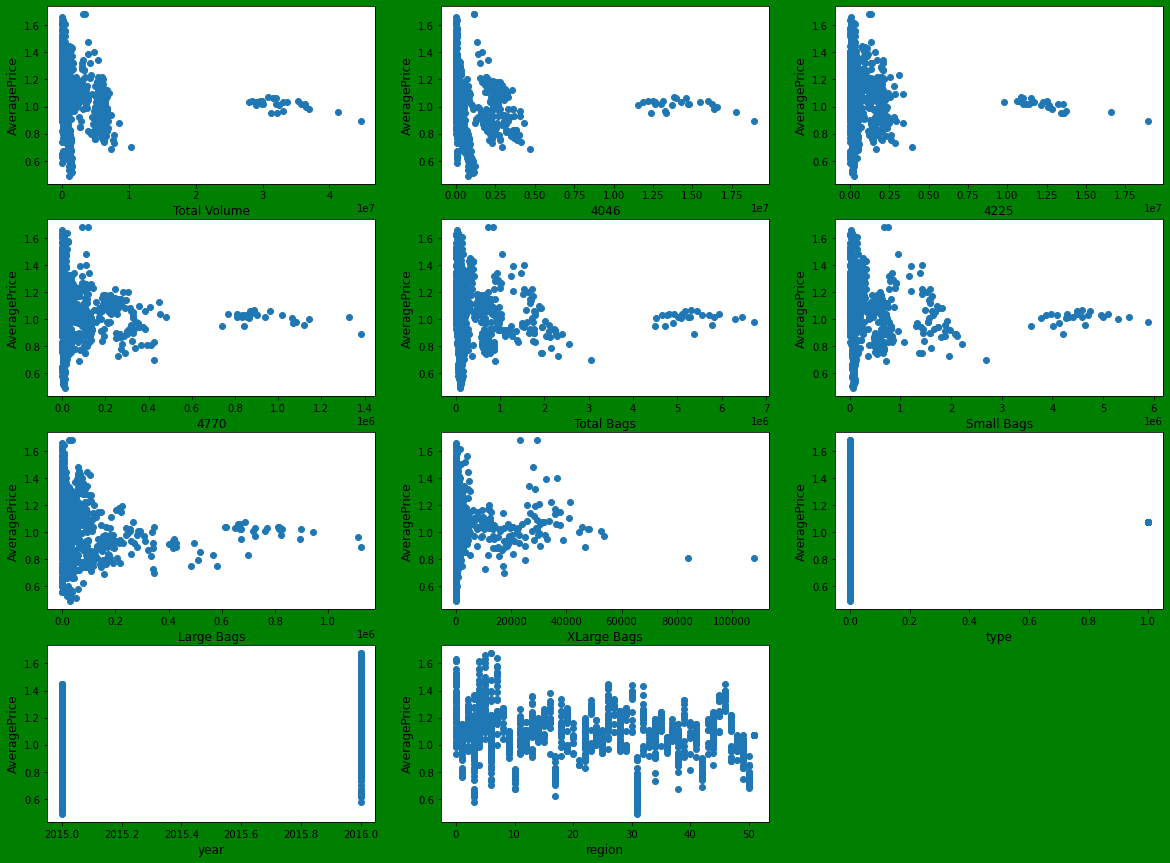

In [54]:
plt.figure(figsize = [20,15], facecolor = 'g')
plotno = 1


for column in x:
    if plotno<=12:
        ax = plt.subplot(4,3,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=12)
        plt.ylabel('AveragePrice',fontsize = 12)
                           
        
    plotno+=1
    
    
plt.show()    

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
x_scaled = scaler.fit_transform(x) 

In [59]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=8)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
lr.score(x_train,y_train)

0.1882909388994708

In [100]:
lr.score(x_test,y_test)

0.11755464840097352

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
knn = KNeighborsRegressor()

In [103]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [104]:
knn.score(x_train,y_train)

0.8992626505256758

In [105]:
knn.score(x_test,y_test)

0.7985461077419492

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt = DecisionTreeRegressor()

In [111]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [112]:
dt.score(x_train,y_train)

1.0

In [113]:
dt.score(x_test,y_test)

0.5923974688415083

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf = RandomForestRegressor()

In [116]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
rf.score(x_train,y_train)

0.9758927285429908

In [118]:
rf.score(x_test,y_test)

0.782011340726891

In [121]:
y_pred = rf.predict(x_test)
y_pred

array([1.07499011, 1.07499011, 1.07499011, ..., 1.07499011, 1.07499011,
       1.07499011])

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
mean_absolute_error(y_test,y_pred)

0.006195870683711101

In [126]:
mean_squared_error(y_test,y_pred)

0.0007167088383279903

In [127]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.02677141830998108

In [128]:
#random forest is the best model for this continuous dataset beacuse it is giving the best score compare to another model

In [129]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


In [132]:
x = data.drop(columns=['region'])
y = data.region

In [133]:
x_scaled = scaler.fit_transform(x)

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=10)

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rfc = RandomForestClassifier()

In [139]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
from sklearn.metrics import classification_report,accuracy_score

In [144]:
y_pred = rfc.predict(x_test)

In [145]:
accuracy_score(y_test,y_pred)

0.9965994656303133